In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler

In [19]:
#import stock data from Yahoo
start_date = '2015-01-01'
end_date = '2020-03-03'
df = web.DataReader('SPY', 'yahoo', start_date, end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,186.159332
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,182.797379
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,181.075607
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,183.332016
2015-01-08,206.160004,203.990005,204.009995,205.899994,147217800.0,186.585236


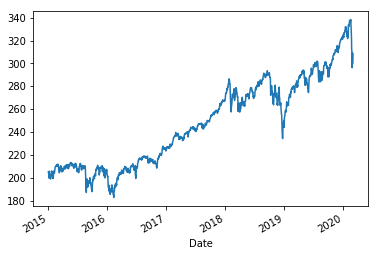

In [21]:
df['Close'].plot()

In [24]:
print(df.shape)

(1300, 6)


In [36]:
#creating dataframe with date and the target variable
new_data = df['Close']
new_data = pd.DataFrame(new_data, columns=['Date', 'Close'])

In [49]:
#Train Test Split
train = new_data[:987]
valid = new_data[987:]
print(valid.shape)
print(train.shape)
x_train = train.drop('Date', axis=1)
y_train = train['Close']
x_valid = valid.drop('Date', axis=1)
y_valid = valid['Close']

(313, 2)
(987, 2)


In [43]:
#Simple Moving Average Method 
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-313+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value:',rms)    


 RMSE value: 130.4259608461263


C:\Newfolder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Newfolder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


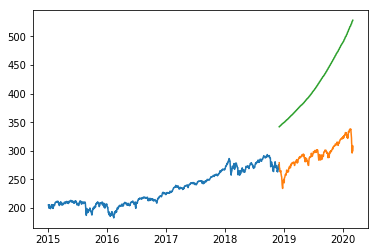

In [44]:
#plot training and validation values together to get plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [45]:
#Linear Regression 


In [46]:
# KNN model
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

C:\Newfolder\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Newfolder\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


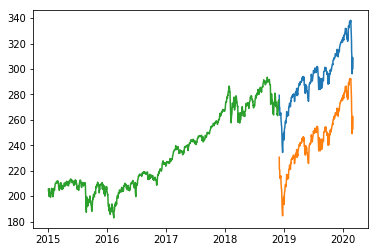

In [52]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [75]:
# Auto ARIMA
from pmdarima import auto_arima

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=313)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
forecast

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=nan, BIC=nan, Time=nan seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=4660.743, BIC=4670.506, Time=0.067 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=4421.545, BIC=4441.071, Time=0.826 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=4089.938, BIC=4109.464, Time=1.984 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=4658.748, BIC=4663.630, Time=0.053 seconds
Fit ARIMA: (1, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=4662.530, BIC=4677.175, Time=0.191 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 0, 12) (constant=True); AIC=4281.897, BIC=4306.304, Time=2.257 seconds
Fit ARIMA: (1, 1, 0)x(2, 1, 1, 12) (constant=True); AIC=4092.543, BIC=4121.832, Time=8.184 seconds
Near non-invertib

,Prediction
Date,
2018-12-03,275.627613
2018-12-04,275.896454
2018-12-06,276.001216
2018-12-07,276.204351
2018-12-10,276.057356
2018-12-11,276.261870
2018-12-12,276.241969
2018-12-13,276.572872
2018-12-14,276.921114


In [76]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

11.198202746079627

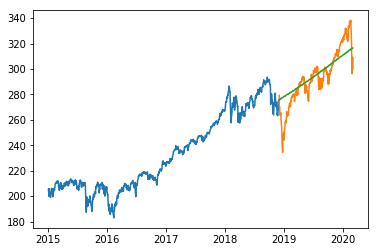

In [77]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [78]:
# LSTM 
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

ModuleNotFoundError: No module named 'keras'